In [13]:
#Library for implementing cryptographic algorithms
!pip install pycrypto
!pip install Fernet
import time
from scipy.spatial.distance import hamming

In [14]:
import hashlib
from Crypto import Random
from Crypto.Cipher import AES
from base64 import b64encode, b64decode

In [15]:
class AESCipher(object):
    
    #initialize block size and generating key 
    def __init__(self, key):
        self.block_size = AES.block_size
        self.key = hashlib.sha256(key.encode()).digest()
    #Encryption Function
    def encrypt(self, plain_text):
        plain_text = self.__pad(plain_text)
        iv = Random.new().read(self.block_size)
        cipher = AES.new(self.key, AES.MODE_CBC, iv)

        '''encode plaintext using b64encode'''
        encrypted_text = cipher.encrypt(plain_text.encode())
        return b64encode(iv + encrypted_text).decode("utf-8")

    #Decryption function
    def decrypt(self, encrypted_text):
        encrypted_text = b64decode(encrypted_text)
        iv = encrypted_text[:self.block_size]
        cipher = AES.new(self.key, AES.MODE_CBC, iv)

        '''decode encrypted text using b64decode'''
        plain_text = cipher.decrypt(encrypted_text[self.block_size:]).decode("utf-8")
        return self.__unpad(plain_text)

    #Padding function 
    def __pad(self, plain_text):
        number_of_bytes_to_pad = self.block_size - len(plain_text) % self.block_size
        ascii_string = chr(number_of_bytes_to_pad)
        padding_str = number_of_bytes_to_pad * ascii_string
        padded_plain_text = plain_text + padding_str
        return padded_plain_text

    #unpadding function
    @staticmethod
    def __unpad(plain_text):
        last_character = plain_text[len(plain_text) - 1:]
        return plain_text[:-ord(last_character)]

In [16]:
obj_AES = AESCipher("54 68 61 74 73 20 6D 79 20 4b 75 6E 67 20 46 75")

plain_text = input("Please Enter plain text:-")
start_time = time.time()
encrypted_text = obj_AES.encrypt(plain_text)
elapsed_time = time.time() - start_time

print("Time used by algorithm to encrypt:- ", elapsed_time)
print(encrypted_text)

Please Enter plain text:-Ruchit Vora
Time used by algorithm to encrypt:-  0.0003876686096191406
8GaKNWUyDowrsw+pUi0J3ePAP7UApNAc9zXSIaatxUM=


In [17]:
decrypted_text = obj_AES.decrypt(encrypted_text)
print("Decryptected Text is :" , decrypted_text)

Decryptected Text is : Ruchit Vora


In [18]:
plain_text2 = input("Please Enter plain text:-")
encrypted_text2 = obj_AES.encrypt(plain_text)
print(encrypted_text2)

ham_distance = hamming(encrypted_text2,encrypted_text) * len(encrypted_text)
print(ham_distance)

Please Enter plain text:-ruchit vora
ubg5TZsaLvWC2Ci6R+paNkT9mIvRC60lWG6r59eWuVg=
44.0


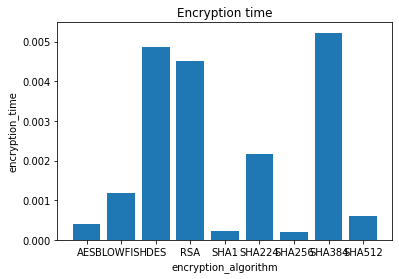

In [38]:
import matplotlib.pyplot as plt


encryption_algorithm = ['AES','BLOWFISH','DES','RSA','SHA1','SHA224','SHA256','SHA384','SHA512']
encryption_time = [0.00041294097900390625,0.0011775493621826172,0.004855680465698242,0.004511117935180664,0.00021791458129882812,0.0021703243255615234,0.0001914501190185547,0.005225181579589844,0.0006103515625]


plt.bar(encryption_algorithm,encryption_time)
plt.title('Encryption time')
plt.xlabel('encryption_algorithm')
plt.ylabel('encryption_time')
# plt.figure() 
# fig, ax = plt.subplots(figsize=(5, 5))
plt.show()

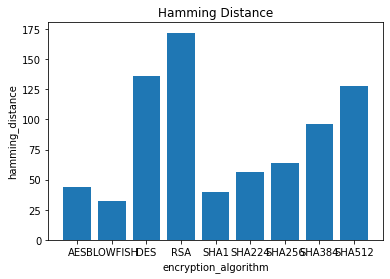

In [40]:
encryption_algorithm = ['AES','BLOWFISH','DES','RSA','SHA1','SHA224','SHA256','SHA384','SHA512']
hamming_distance = [44.0,32.0,136.0,172.0,40,56,64,96,128]

plt.bar(encryption_algorithm,hamming_distance)
plt.title('Hamming Distance')
plt.xlabel('encryption_algorithm')
plt.ylabel('hamming_distance')
plt.show()